## Purchasing intention
### Projekt zaliczeniowy z przedmiotu Podstawy Uczenia Maszynowego
#### Mateusz Białecki, Mateusz Bereta, Informatyka semestr VI, Wydział Matematyki Stosowanej

In [3]:
import pandas as pd

In [4]:
baza = pd.read_csv("online_shoppers_intention.csv")

### Prezentacja zbioru danych

### Omówienie rozwiązywanego problemu

Na podstawie argumentów bazy, opisanych wyżej, chcemy ustalić, czy dana osoba zakupi jakiś produkt czy też nie.

### Pierwsza metoda - las losowy

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [30]:
X = baza.drop('Revenue', axis=1)
Y = baza['Revenue']


In [38]:
# Label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X["Month"] = le.fit_transform(X["Month"])
X["VisitorType"] = le.fit_transform(X["VisitorType"])
x_train, x_test, y_train,  y_test = train_test_split(X, Y, random_state=12)

In [48]:
forest = RandomForestClassifier(n_estimators=100,
                                max_leaf_nodes=12,
                                n_jobs=-1,
                                random_state=12)
forest.fit(x_train, y_train)

RandomForestClassifier(max_leaf_nodes=12, n_jobs=-1, random_state=12)

In [49]:
forest_train_score = forest.score(x_train, y_train)
forest_test_score = forest.score(x_test, y_test)

print("Las losowy na zbiorze testowym uzyskał dokładność rzędu "
      f"{round(forest_train_score * 100, 2)}%, zaś na zbiorze testowym {round(forest_test_score * 100 ,2)}%")

Las losowy na zbiorze testowym uzyskał dokładność rzędu 90.26%, zaś na zbiorze testowym 89.56%


In [60]:
numbers = np.arange(1, 31)
for number, score in zip(numbers, forest.feature_importances_):
    print(f'{number}.{baza.columns[number]}, istotność: {score:.3f}')
print('Posortowane cechy od najmniej do najbardziej istotnej')
print(np.argsort(forest.feature_importances_) + 1)
print('Pięć najbardziej istotnych cech ma łączny wpływ '
      f'{np.sum(np.sort(forest.feature_importances_)[-5:]) * 100.:.3f} % na podjęcie decyzji.')

1.Administrative_Duration, istotność: 0.020
2.Informational, istotność: 0.019
3.Informational_Duration, istotność: 0.002
4.ProductRelated, istotność: 0.007
5.ProductRelated_Duration, istotność: 0.034
6.BounceRates, istotność: 0.069
7.ExitRates, istotność: 0.036
8.PageValues, istotność: 0.075
9.SpecialDay, istotność: 0.688
10.Month, istotność: 0.001
11.OperatingSystems, istotność: 0.036
12.Browser, istotność: 0.000
13.Region, istotność: 0.000
14.TrafficType, istotność: 0.001
15.VisitorType, istotność: 0.003
16.Weekend, istotność: 0.009
17.Revenue, istotność: 0.000
Posortowane cechy od najmniej do najbardziej istotnej
[17 12 13 14 10  3 15  4 16  2  1  5  7 11  6  8  9]
Pięć najbardziej istotnych cech ma łączny wpływ 90.442 % na podjęcie decyzji.


ValueError: shape mismatch: objects cannot be broadcast to a single shape

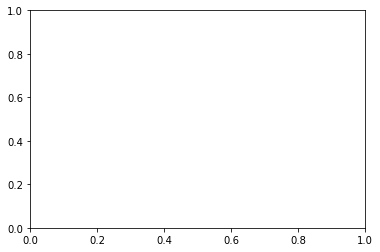

### Druga metoda - 

### Podsumowanie